<a href="https://colab.research.google.com/github/BG4Finance/On_Going_Proj/blob/master/Stock_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stocca setting UP


In [0]:
! pip install yahoo_fin
! pip install requests_html

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import tensorflow as tf
from yahoo_fin.stock_info import get_analysts_info, get_balance_sheet, get_live_price, get_data
import pandas_datareader as web
import requests_html
import csv
from google.colab import files

# Data Gathering
S&P companies

In [0]:
today = str(dt.date.today())
print(today)
start = "2018-01-01"

2019-11-25


In [0]:
tickers = pd.read_csv('/content/complete.csv')
len(tickers)

505

In [0]:
#FIrst return vector
ret_cost = web.get_data_yahoo(tickers['Symbol'][0], start = start, end = today)
ret_cost = np.array(ret_cost['Adj Close'].ffill().pct_change())
ret_cost = ret_cost.reshape(ret_cost.shape[0],1)
#Second return vector
vec = web.get_data_yahoo(tickers['Symbol'][1], start = start, end = today) 
vec = np.array(vec['Adj Close'].ffill().pct_change())
vec = vec.reshape(vec.shape[0],1)
#Matrix building
ret_cost = np.hstack((ret_cost,vec))

In [0]:
ret_cost = web.get_data_yahoo(tickers['Symbol'][0], start = start, end = today)
ret_cost = np.array(ret_cost['Adj Close'].ffill().pct_change())
ret_cost = ret_cost.reshape(ret_cost.shape[0],1)
ejected = 0
for var in range(1,len(tickers)) :
  try:
    vec = web.get_data_yahoo(tickers['Symbol'][var], start = start, end = today) 
    vec = np.array(vec['Adj Close'].ffill().pct_change())
    vec = vec.reshape(vec.shape[0],1)
    if vec.shape[0]==ret_cost.shape[0]:
      ret_cost = np.hstack((ret_cost,vec), )
      print(vec[1])
    else:
      print("padding avoided, SKIP at", var)
      ejected = ejected + 1
  except:
    print('EJECT at:', var)
    ejected = ejected + 1
  print(ret_cost.shape)

[0.0060133]
(478, 2)
[0.00221116]
(478, 3)
[0.0156486]
(478, 4)
[0.00461524]
(478, 5)
[0.01554967]
(478, 6)
[-0.01206844]
(478, 7)
[0.0187957]
(478, 8)
[0.00904894]
(478, 9)
[0.05191263]
(478, 10)
[-0.0009192]
(478, 11)
EJECT at: 11
(478, 11)
[-0.00453116]
(478, 12)
[0.00295552]
(478, 13)
[0.02544373]
(478, 14)
[0.0054376]
(478, 15)
[0.00579629]
(478, 16)
[-0.00466593]
(478, 17)
[0.00197664]
(478, 18)
[-0.00469476]
(478, 19)
[0.00725509]
(478, 20)
[0.02929393]
(478, 21)
[0.00425476]
(478, 22)
[-0.00105684]
(478, 23)
[0.01856416]
(478, 24)
[-0.00878648]
(478, 25)
[0.00058876]
(478, 26)
[0.01706102]
(478, 27)
[0.01641313]
(478, 28)
EJECT at: 29
(478, 28)
[0.01277528]
(478, 29)
[-0.00513782]
(478, 30)
[-0.01226657]
(478, 31)
[-0.00842444]
(478, 32)
[0.00616539]
(478, 33)
[0.01109236]
(478, 34)
[0.00389708]
(478, 35)
[-0.00707245]
(478, 36)
EJECT at: 38
(478, 36)
[0.00372186]
(478, 37)
[0.00879722]
(478, 38)
[0.01887004]
(478, 39)
[0.01298401]
(478, 40)
EJECT at: 43
(478, 40)
[0.01240588]


# Data optimization

In [0]:
#ERASING FIRST ROW 
clean_ret = np.delete(ret_cost, 0, 0)
clean_ret = np.delete(clean_ret, obj=clean_ret.shape[0]-1, axis=0)

#LAST ROW FOR FORECAST
to_forecast = ret_cost[477]

In [0]:
Y = web.get_data_yahoo('^GSPC', start = start, end = today)
Y = np.array(Y['Adj Close'].ffill().pct_change())
Y = Y.reshape(Y.shape[0],1)
Y = np.delete(Y, 0, 0)
Y = np.delete(Y, 0, 0)
print(clean_ret.shape, Y. shape)

(476, 466) (476, 1)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
np.savetxt("DATA.csv", clean_ret, delimiter=",")
np.savetxt("S&P.csv", Y, delimiter=",")

In [0]:
clean_ret = pd.read_csv("/content/drive/My Drive/colab_notebooks/DATA.csv") 
Y = pd.read_csv("/content/drive/My Drive/colab_notebooks/S&P.csv")

In [0]:
rating = np.empty(len(Y), dtype=int)

for i in range(0,len(Y)):
  if Y[i] >= 0.02 :
    rating[i] = 4
  elif Y[i] < 0.02 and Y[i] >= 0 :
    rating[i] = 3
  elif Y[i] < 0 and Y[i] > -0.02 :
    rating[i] = 2
  elif Y[i]<-0.02 :
    rating[i] = 1

In [0]:
x_train, x_test, y_train, y_test, rating_train, rating_test = train_test_split(clean_ret, Y, rating, test_size=0.3, stratify=rating)

In [0]:
days = x_train.shape[0]
ones = np.ones((days, 1))

array([2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 3, 1, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2,
       3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2,
       2, 3, 3, 3, 3, 2, 3, 1, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3,
       1, 2, 2, 4, 3, 3, 2, 2, 4, 3, 2])

#Classification & Regression

In [0]:
from numpy.linalg import inv
import statistics
from keras import Sequential, optimizers
from keras.layers import Dense, Conv1D, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split

### *BETA* regression

In [0]:
# Now estimate the regression parameters from the data
returns = np.hstack((np.ones((x_train.shape[0], 1)), x_train))

S = np.dot(returns.T, returns)
S_inv = np.linalg.inv(S)
theta_hat = S_inv.dot(returns.T).dot(y_train)

print('Estimated theta: {}'.format(theta_hat))

In [0]:
reg_test = np.dot(np.hstack((np.ones((x_test.shape[0], 1)), x_test)),theta_hat)
regr_rati = np.empty(len(reg_test), dtype=int)
for i in range(0,len(reg_test)):
  if reg_test[i] >= 0.02 :
    regr_rati[i] = 4
  elif reg_test[i] < 0.02 and reg_test[i] >= 0 :
    regr_rati[i] = 3
  elif reg_test[i] < 0 and reg_test[i] > -0.02 :
    regr_rati[i] = 2
  elif reg_test[i]<-0.02 :
    regr_rati[i] = 1

In [0]:
np.mean(np.subtract(rating_test,regr_rati))

-0.02097902097902098

In [0]:
print(np.mean(np.subtract(x_test,reg_test)),np.max(reg_test))

-0.21187147341350707 4.953172686428929


# Advanced Netowrks

In [0]:
# Standardize data
X = (clean_ret - clean_ret.mean(0)) / clean_ret.std(0)

legendary = np.empty(len(rating), dtype=int)
for i in range(0,len(rating)):
  if rating[i] >= 4 :
    legendary[i] = 1
  else :
    legendary[i] = 0

In [0]:
# Split train / test / validation data
X_train, X_test, y_train, y_test = train_test_split(X, legendary, test_size=0.1, stratify=legendary)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)

# Compute class weights
days = X_train.shape[0]
n_legendaries = legendary.sum()
n_classes = 2
class_weights = {0: days / (n_classes * (days - n_legendaries)), #common weight
                 1: days / (n_classes * n_legendaries)}          #legendary weight

print('Training data: {} legendaries out of {} days'.format(n_legendaries, days))
print('Training data: class weights {}'.format(class_weights))
print(X_train.shape)

Training data: 116 legendaries out of 352 days
Training data: class weights {0: 0.7457627118644068, 1: 1.5172413793103448}
(352, 505)


In [0]:
network=Sequential()
network.add(Dense(32, activation='relu', input_shape=X.shape[1:]))
network.add(Dense(10, activation='relu'))
network.add(Dense(5, activation='relu'))
network.add(Dense(1, activation='softmax'))
network.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'], weighted_metrics=['accuracy'] )
network.fit(X_train, y_train, epochs=100,validation_data=[X_val,y_val] ,class_weight=class_weights)

Test loss: 11.730334715409713 - Test acc: 0.26420454545454547
Validation loss: 11.558229160308837 - Validation Acc:0.275


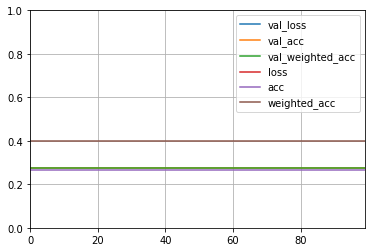

In [0]:
train_scores = network.evaluate(X_train,y_train, verbose=0)
val_scores = network.evaluate(X_val,y_val, verbose=0)
print('Test loss: {} - Test acc: {}'.format(*train_scores))
print('Validation loss: {} - Validation Acc:{}'.format(*val_scores))
pd.DataFrame(network.history.history).plot()
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# NN Building

In [0]:
x_train, x_test, y_train, y_test = train_test_split(clean_ret, Y, test_size=0.2, random_state=0)

In [0]:
x_train.shape

(348, 505)

## Basic Network

In [0]:
# Build model
model = Sequential()
model.add(Dense(300, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1,activation='relu'))

# Compile model
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [0]:
model.fit(x_train,y_train, epochs=30, validation_data=(x_test, y_test))

## Convolutional model

In [0]:
model = Sequential()
model.add(Conv2D(50, (3, 3), activation='tanh', input_shape= (,505) ) )
model.add(Conv2D(100, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(300, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(1, activation='tanh'))


In [0]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=30, validation_data=(x_test, y_test))

##Test NNs

In [0]:
input = keras.layers.Input(shape=x_train.shape)
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [0]:
 model.compile(loss="mse",
                  optimizer="sgd",
                  metrics=["accuracy"])

In [0]:
model.fit(x_train,y_train, epochs=30, validation_data=(x_test, y_test))

In [0]:
net = keras.models.Sequential()
net.add(keras.layers.Flatten())
net.add(keras.layers.Dense(300, activation="tanh"))
net.add(keras.layers.Dense(100, activation="tanh"))
net.add(keras.layers.Dense(10, activation="softmax"))

In [0]:
net.compile(loss="mean_squared_error", optimizer="sgd", metrics=['accuracy'])

In [0]:
net.fit(x_train,y_train, epochs=200, validation_data=(x_test, y_test))